In [1]:
import numpy as np
import ROOT

Welcome to JupyROOT 6.26/00


In [2]:
ROOT.gInterpreter.ProcessLine('#include "../src/debug.h"')

0

In [3]:
ROOT.gStyle.SetOptFit()

In [4]:
from ROOT import plot_histo, true_histo, reco_histo, asymmetry 

In [5]:
%jsroot off

# Debugging

In [6]:
path = "../data_files/"
# data = [["jpsi_0_0.root", "jpsi_0_1.root"], ["drell_yan_0_0.root", "drell_yan_0_1.root"]]
data = [["jpsi_1_0.root", "jpsi_1_1.root"], ["drell_yan_1_0.root", "drell_yan_1_1.root"]]
# data = [["jpsi_2_0.root", "jpsi_2_1.root"], ["drell_yan_2_0.root", "drell_yan_2_1.root"]]
# data = [["jpsi_3_0.root", "jpsi_3_1.root"], ["drell_yan_3_0.root", "drell_yan_3_1.root"]]

In [7]:
ntype = 2
nspin = 2
phi_bins = 10
pi = ROOT.TMath.Pi()
int_lumi = np.array([(3.92904e+08)/2, (9.69152e+08)/2])
exp_lumi = np.array([(7.0e+04)*4, (7.0e+04)*4])
mass_min = 2.5
mass_max = 3.5

In [8]:
hist_phi0 = {}
hist_phi1 = {}
hist_mass01 = {}
hist_mass02 = {}
hist_mass03 = {}
hist_mass11 = {}
hist_mass12 = {}
hist_mass13 = {}

In [9]:
for i in range(ntype):
    for j in range(nspin):
        hist_name1 = "true_phi"+str(i)+str(j)
        hist_phi0[i, j] = true_histo(path+data[i][j], mass_min, mass_max, phi_bins, -pi, pi, int_lumi[i], exp_lumi[i], hist_name1)
        hist_name2 = "reco_phi"+str(i)+str(j)
        hist_phi1[i, j] = reco_histo(path+data[i][j], mass_min, mass_max, phi_bins, -pi, pi, int_lumi[i], exp_lumi[i], hist_name2)

read from file : ../data_files/jpsi_1_0.root
entries : 1500000
read from file : ../data_files/jpsi_1_0.root
entries : 1500000
read from file : ../data_files/jpsi_1_1.root
entries : 1500000
read from file : ../data_files/jpsi_1_1.root
entries : 1500000
read from file : ../data_files/drell_yan_1_0.root
entries : 3700000
read from file : ../data_files/drell_yan_1_0.root
entries : 3700000
read from file : ../data_files/drell_yan_1_1.root
entries : 3700000
read from file : ../data_files/drell_yan_1_1.root
entries : 3700000


In [10]:
func = ROOT.TF1("func", "[0]* sin(x)", -pi, pi)

 FCN=6.7461 FROM MIGRAD    STATUS=CONVERGED      16 CALLS          17 TOTAL
                     EDM=4.76157e-20    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0           9.34643e-01   1.76365e-04   3.00000e-04  -1.74976e-06


Warning in <TH1D::Sumw2>: Sum of squares of weights structure already created
Info in <TCanvas::MakeDefCanvas>:  created default TCanvas with name c1


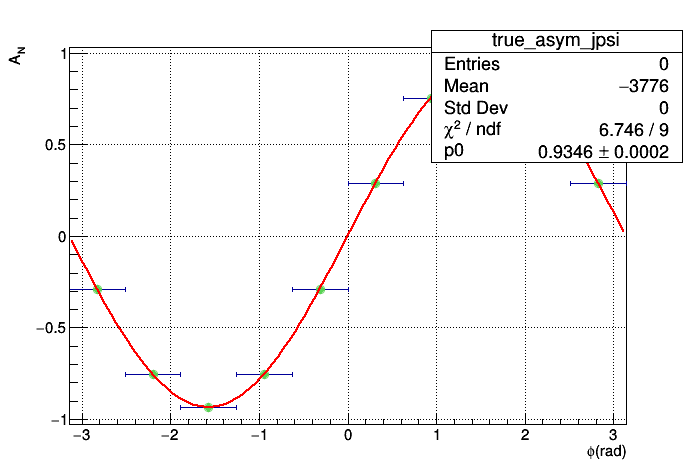

In [11]:
hist1 = asymmetry(hist_phi0[0, 0], hist_phi0[0, 1], "true_asym_jpsi")
hist1.Fit(func)
plot_histo(hist1)

 FCN=14.6604 FROM MIGRAD    STATUS=CONVERGED      12 CALLS          13 TOTAL
                     EDM=5.2461e-16    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0           8.97280e-01   6.43433e-03   1.24330e-05   5.03420e-06


Warning in <TH1D::Sumw2>: Sum of squares of weights structure already created


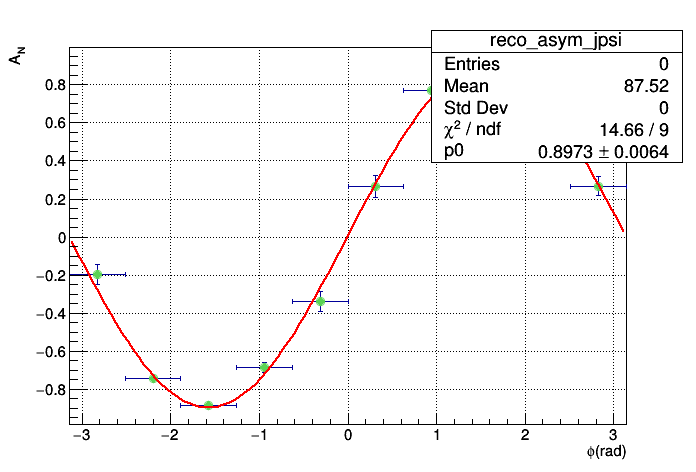

In [12]:
hist2 = asymmetry(hist_phi1[0, 0], hist_phi1[0, 1], "reco_asym_jpsi")
hist2.Fit(func)
plot_histo(hist2)

 FCN=14.6921 FROM MIGRAD    STATUS=CONVERGED      14 CALLS          15 TOTAL
                     EDM=9.41325e-14    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0           4.67121e-01   1.46413e-03   2.83198e-06  -2.96350e-04


Warning in <TH1D::Sumw2>: Sum of squares of weights structure already created


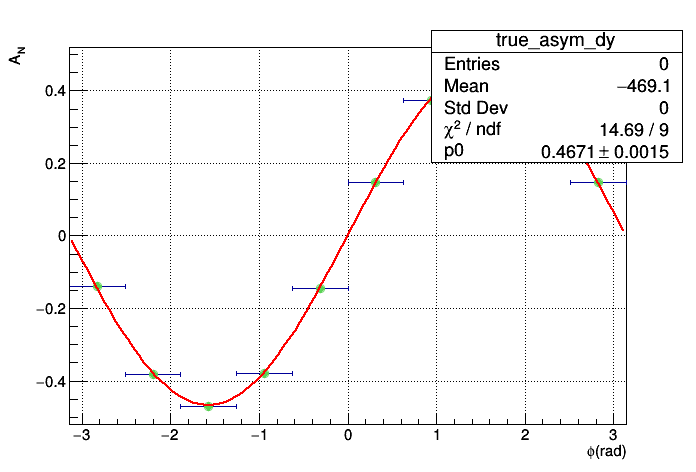

In [13]:
hist3 = asymmetry(hist_phi0[1, 0], hist_phi0[1, 1], "true_asym_dy")
hist3.Fit(func)
plot_histo(hist3)

 FCN=5.05321 FROM MIGRAD    STATUS=CONVERGED      12 CALLS          13 TOTAL
                     EDM=6.89852e-17    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0           4.39023e-01   1.35785e-02   1.63123e-05   8.65048e-07


Warning in <TH1D::Sumw2>: Sum of squares of weights structure already created


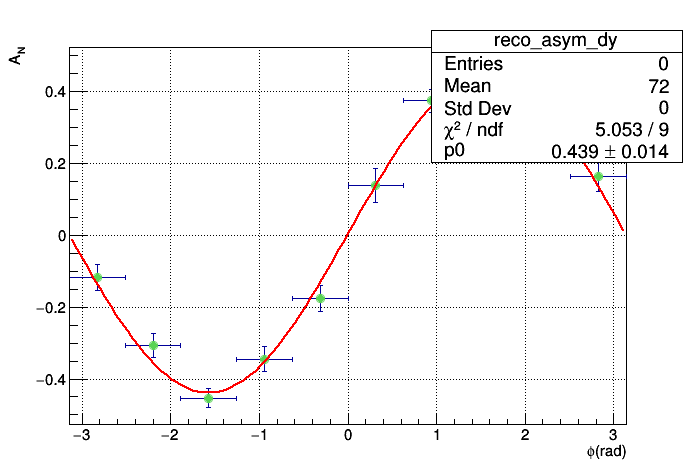

In [14]:
hist4 = asymmetry(hist_phi1[1, 0], hist_phi1[1, 1], "reco_asym_dy")
hist4.Fit(func)
plot_histo(hist4)